In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv


# Importing required libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import  LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import LabelEncoder, FunctionTransformer, RobustScaler

# Loading the data

In [3]:
# Loading train and test datasets
train_df = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv')
test_df = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv')

# Exploratory Data Analysis(EDA) and Visualisation



In [4]:
# Train dataframe head
train_df.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no


In [5]:
# Basic information about train dataframe
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.

In [6]:
# Percentage of missing values for each column
train_df.isna().sum()/len(train_df)*100

last contact date     0.000000
age                   0.000000
job                   0.584020
marital               0.000000
education             3.741297
default               0.000000
balance               0.000000
housing               0.000000
loan                  0.000000
contact              26.359950
duration              0.000000
campaign              0.000000
pdays                 0.000000
previous              0.000000
poutcome             75.109026
target                0.000000
dtype: float64

In [7]:
# Summary statistics for numeric columns
train_df.describe()

,age,balance,duration,campaign,pdays,previous
count,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000
mean,42.120247,5441.781719,439.062789,5.108770,72.256051,11.826171
std,12.709352,16365.292065,769.096291,9.890153,160.942593,44.140259
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,98.000000,109.000000,1.000000,-1.000000,0.000000
50%,40.000000,549.000000,197.000000,2.000000,-1.000000,0.000000
75%,50.000000,2030.000000,380.000000,4.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
# Number of unique values in each column
for i in train_df.columns:
  print(i,train_df[i].nunique())

last contact date 1013
age 78
job 11
marital 3
education 3
default 2
balance 9535
housing 2
loan 2
contact 2
duration 3146
campaign 63
pdays 865
previous 276
poutcome 3
target 2


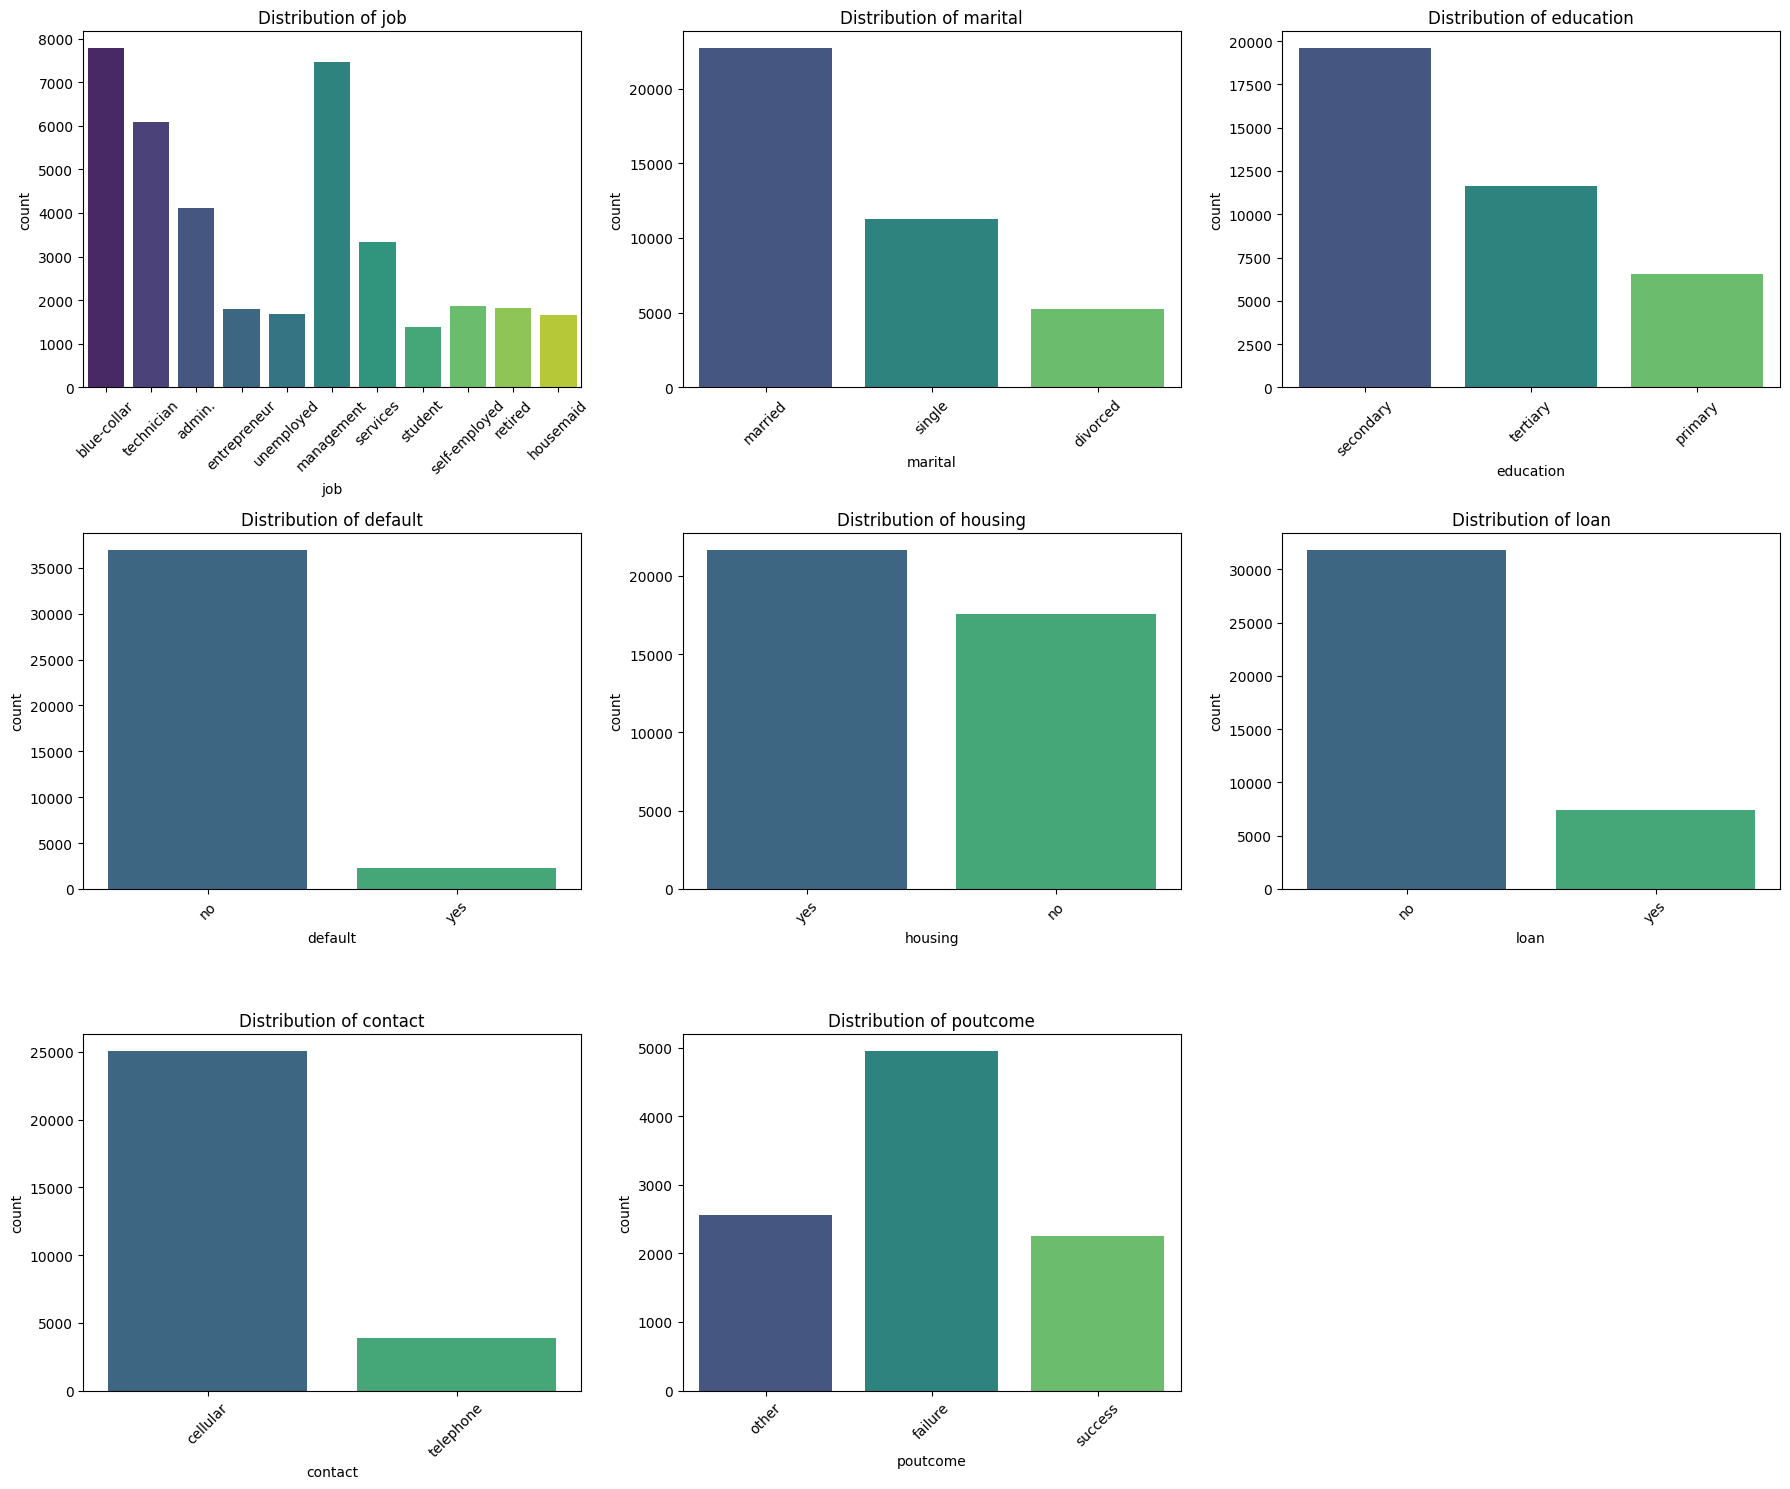

In [9]:
# Univariate Analysis(Categorical Features)
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

plt.figure(figsize=(18, 15))

# Generating Count plot for each categorical column
counter = 1 
for col in categorical_columns:
    plt.subplot(3, 3, counter)
    sns.countplot(data=train_df, x=col, palette='viridis')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    counter += 1  

plt.tight_layout()
plt.show()

**Insights:**  
**Job Distribution:**
The most common job categories are "management," "blue-collar," and "technician."
Categories like "housemaid" and "self-employed" have significantly lower counts, indicating that clients in management, blue-collar, and technician jobs are primarily targeted.

**Marital Status Distribution:**
Most clients are "married," followed by "single" and "divorced."
This indicates a higher engagement with married individuals, possibly due to perceived stability.

**Education Distribution:**
The majority of clients have a "secondary" education level, followed by "tertiary" and then "primary."
This could reflect the bank’s preference for targeting clients with at least a high school education.

**Credit Default Status:**
Most clients do not have a credit default, which could mean the bank prefers low-risk clients.
Very few clients with a credit default are included, suggesting limited outreach to higher-risk individuals.

**Housing Loan Status:**
A majority have housing loans.
This may indicate that clients with housing loans are considered more reliable or have a closer financial relationship with the bank.

**Personal Loan Status:**
Most clients do not have personal loans.
This could indicate that the bank is focusing on clients without additional financial obligations, potentially to maximize term deposit engagement.

**Contact Type:**
"Cellular" is the primary communication type, with fewer contacts made via "telephone."
This could imply that mobile contact methods are more effective or preferred.

**Previous Campaign Outcome (Poutcome):**
The majority of previous campaigns ended in "failure," with fewer resulting in "success."
This suggests the challenges the bank faces in converting clients but indicates that prior campaign outcomes might be a useful feature to predict success rates.

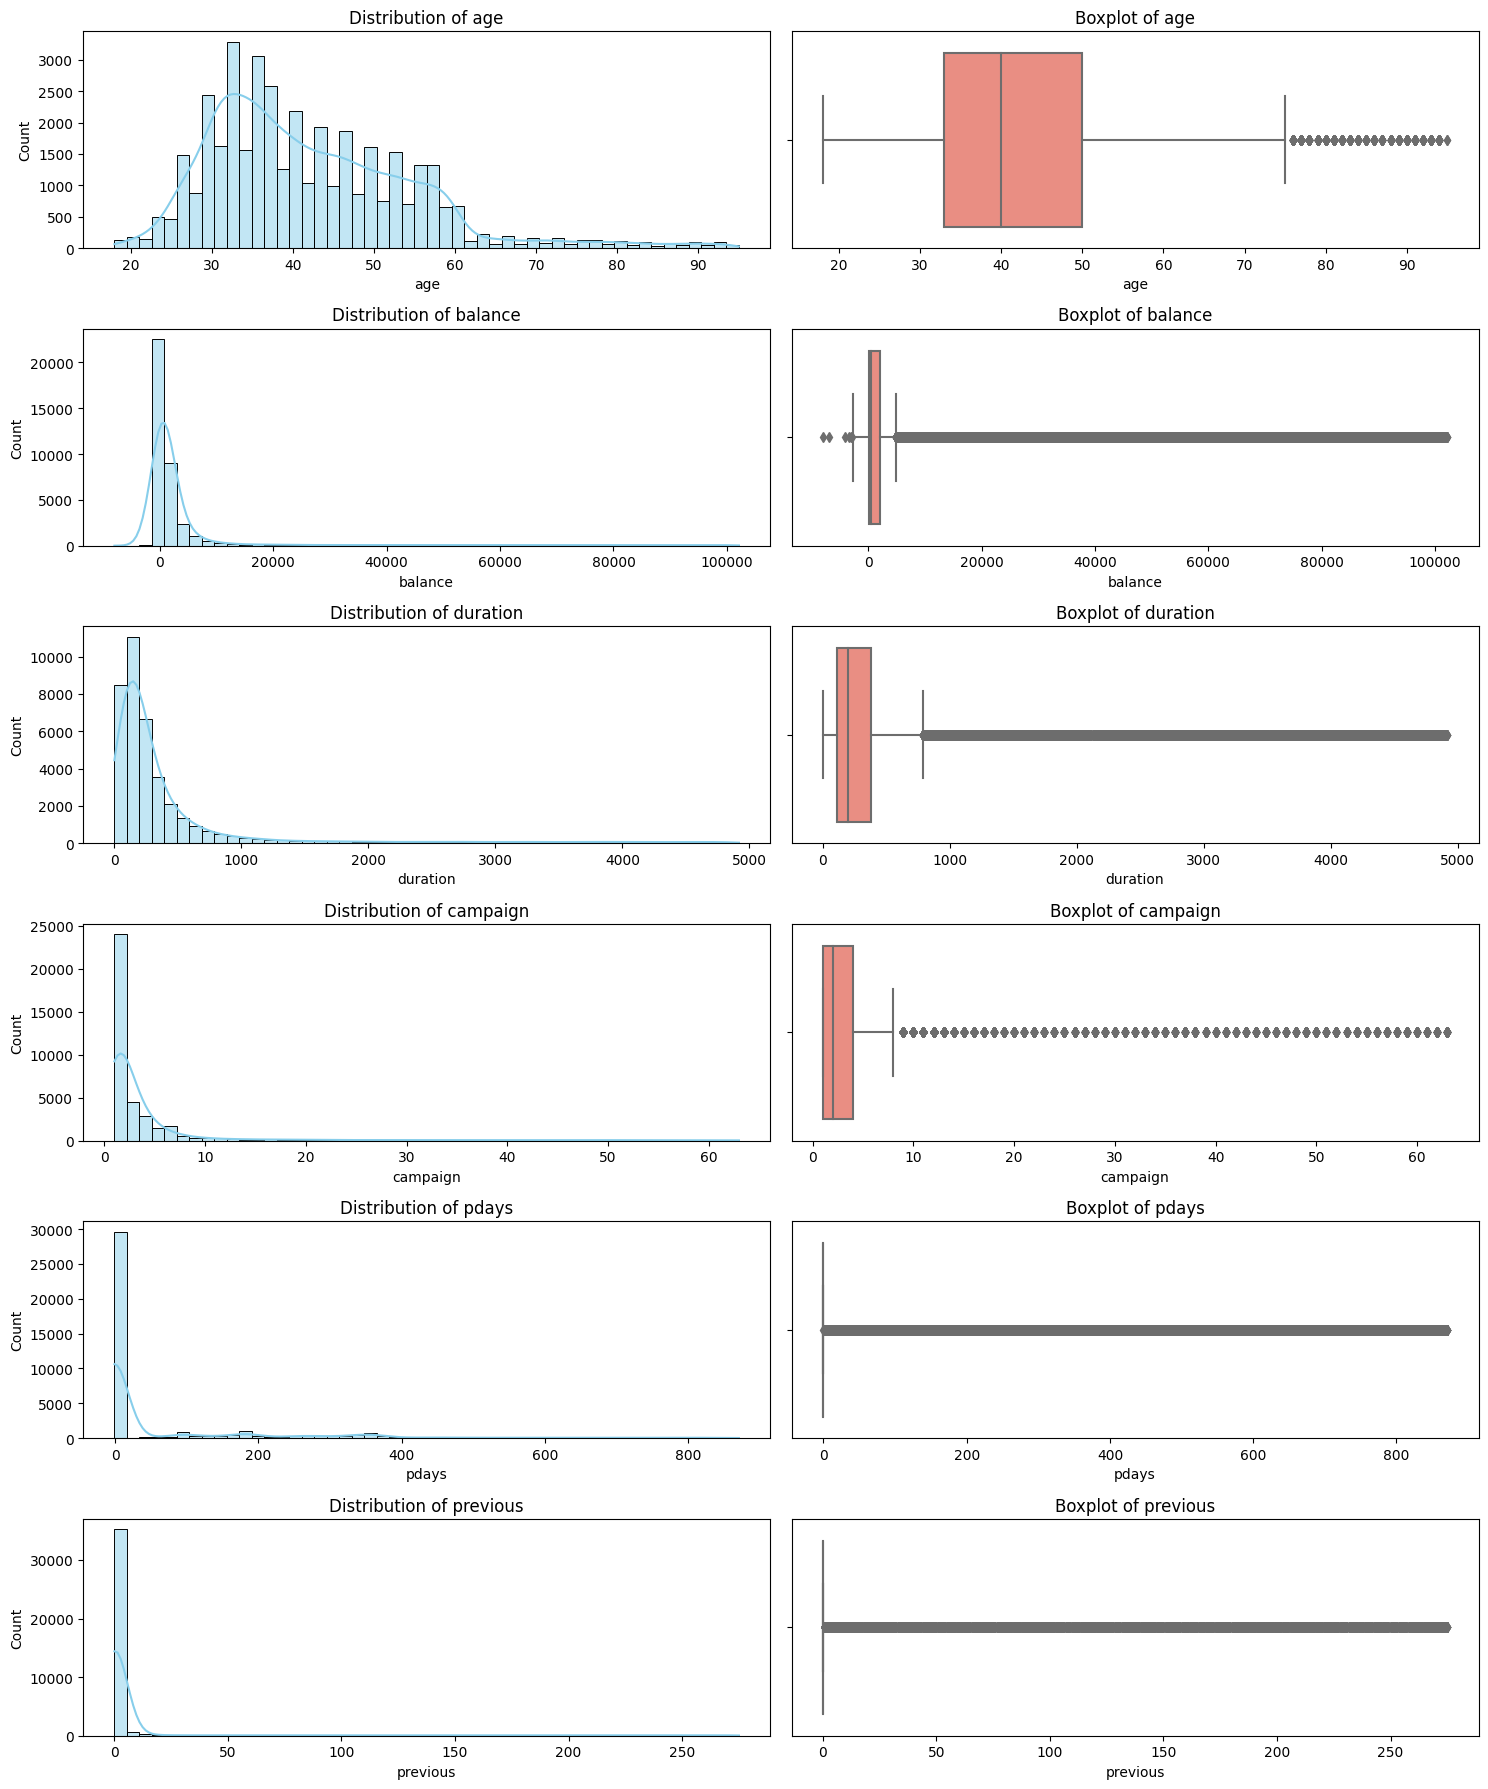

In [10]:
# Univariate Analysis(Numerical Features)
import warnings
warnings.filterwarnings('ignore')

numerical_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

plt.figure(figsize=(15,18))

# Generating Histogram and Boxplot for each numerical column
counter = 1 
for col in numerical_columns:
    # Histogram
    plt.subplot(len(numerical_columns), 2, counter)
    sns.histplot(train_df[col], bins=50, kde=True, color="skyblue")
    plt.title(f"Distribution of {col}")
    counter += 1  

    # Boxplot
    plt.subplot(len(numerical_columns), 2, counter)
    sns.boxplot(x=train_df[col], color="salmon")
    plt.title(f"Boxplot of {col}")
    counter += 1

plt.tight_layout()
plt.show()

**Insights:** 
Almost all numeric variables has a significant number of outliers and
Most of the features are right-skewed.

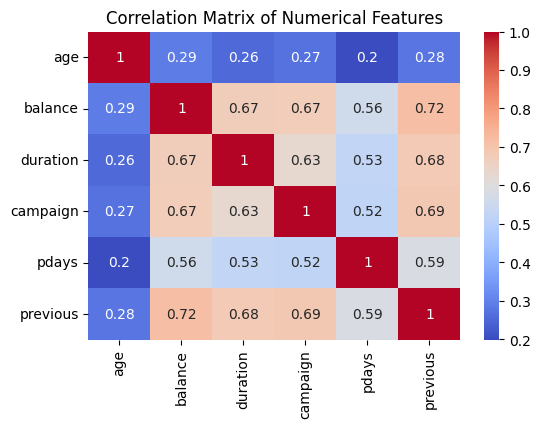

In [11]:
# Multivariate Analysis
# Correlation Matrix as a Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(train_df[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

**Insights:**
**Balance & Duration:** Moderate correlation (0.67); suggesting that clients with higher balances tend to engage in longer conversations.

**Balance & Campaign:** Moderate correlation (0.67),implying that clients with higher balances might be targeted more frequently or may respond better to more frequent contact.

**Previous & Balance:** Strong correlation (0.72); clients with past interactions often have higher balances.

**Previous & Duration:** Moderate correlation (0.68); prior engagements correlate with longer recent interactions.

**Duration & Campaign:** Moderate correlation (0.63); longer interactions or campaigns may enhance client engagement.

Most features show moderate to low correlations, indicating minimal multicollinearity in the data. However, balance, duration, campaign and previous are somewhat correlated.


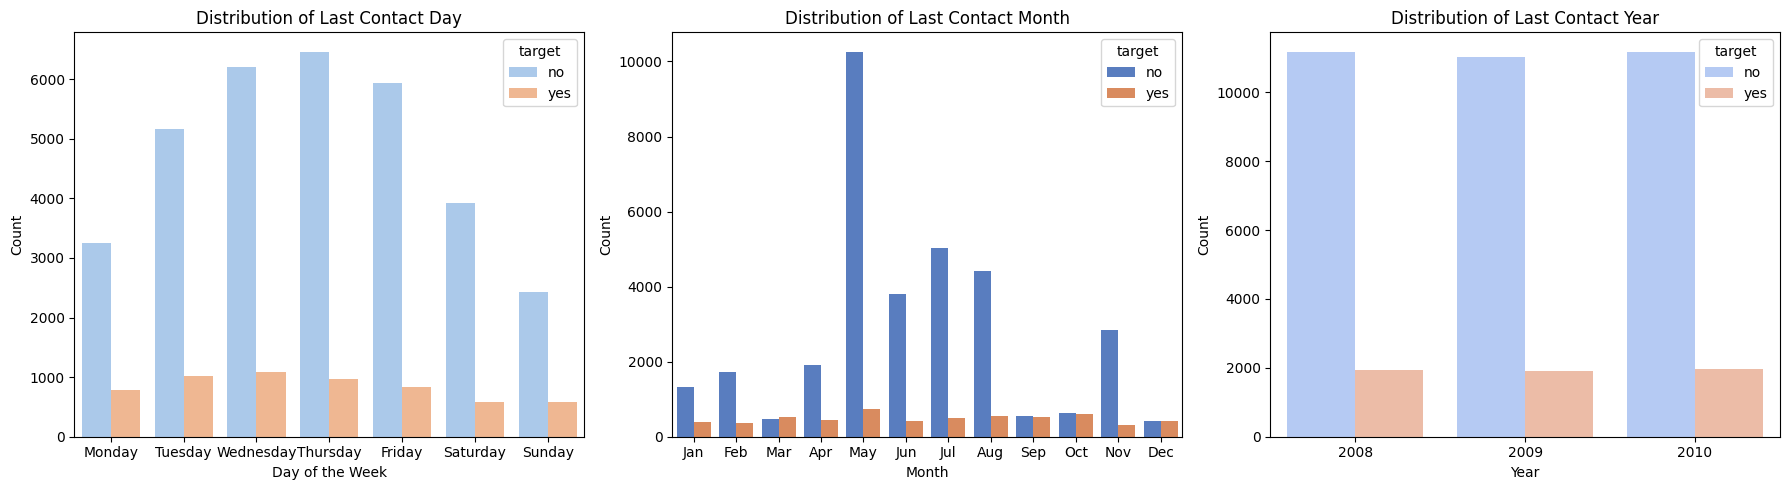

In [12]:
# Bar Charts for Day, Month, and Year
train_df['last contact date'] = pd.to_datetime(train_df['last contact date'])

#Creating new columns from last contact date:
train_df['contact_day'] = train_df['last contact date'].dt.day_name()
train_df['contact_month'] = train_df['last contact date'].dt.month_name().str[:3]  
train_df['contact_year'] = train_df['last contact date'].dt.year

plt.figure(figsize=(18, 5))

# Plotting the day distribution
plt.subplot(1, 3, 1)
sns.countplot(x='contact_day', data=train_df, hue='target', order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], palette='pastel')
plt.title('Distribution of Last Contact Day')
plt.xlabel('Day of the Week')
plt.ylabel('Count')

# Plotting the month distribution
plt.subplot(1, 3, 2)
sns.countplot(x='contact_month', data=train_df, hue='target', order=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], palette='muted')
plt.title('Distribution of Last Contact Month')
plt.xlabel('Month')
plt.ylabel('Count')

# Plotting the year distribution
plt.subplot(1, 3, 3)
sns.countplot(x='contact_year', data=train_df, hue='target', palette='coolwarm')
plt.title('Distribution of Last Contact Year')
plt.xlabel('Year')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


**Insights:**
**Distribution of Last Contact Day:**
The majority of outcomes are "no," with a smaller portion of "yes" across all days.

**Distribution of Last Contact Month:**
The proportion of "yes" outcomes is relatively low compared to "no" across all months.

**Distribution of Last Contact Year:**
Each year shows a similar low proportion of "yes" outcomes relative to "no."

The distributions suggest that the "Last Contact Day," "Month," and "Year" features have limited impact on the likelihood of a "yes" outcome and these features don't contribute significantly to the model's performance in further testing, so these features can be dropped.

In [13]:
#Removing the last contact date column from the datasets
train_df = train_df.drop(columns=['last contact date'])
test_df = test_df.drop(columns=['last contact date'])

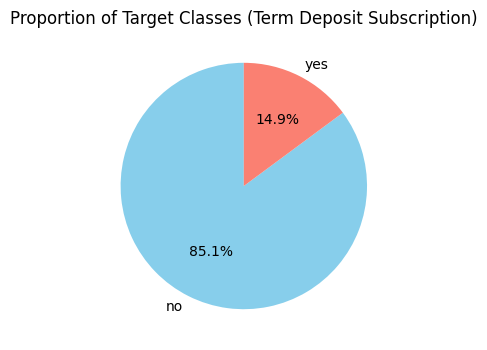

In [14]:
# Plotting a pie chart for the target column
train_df['target'].value_counts().plot(
    kind='pie', 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['skyblue', 'salmon'],
    figsize=(4, 4),
    title="Proportion of Target Classes (Term Deposit Subscription)"
)

plt.ylabel('') 
plt.show()


**Insights:**
This pie chart displays the proportion of clients who subscribed to a term deposit ("yes") versus those who did not ("no"). A significant class imbalance exists, with 85.1% of clients not subscribing to a term deposit and only 14.9% subscribing.

# Train-Validation Split

In [15]:
# Separating features from the target variable in the train Data
X = train_df.drop('target', axis=1)
y = train_df['target'].map({'yes': 1, 'no': 0})

# Splitting the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Data Preprocessing

In [16]:
#Categorical and Numerical Columns
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
num_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Feature Transformation Pipeline   
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([('imputer', SimpleImputer(strategy='mean')), ('scaler', RobustScaler())]), num_cols),
        ('cat', Pipeline([('imputer', SimpleImputer(strategy='most_frequent')), ('encoder', OneHotEncoder(handle_unknown='ignore'))]), cat_cols)
    ]
)
# Applying the Preprocessing Pipeline
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(test_df)

# Feature Selection

In [17]:
#RFE with RandomForestClassifier as the estimator
rfe_selector = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=10)

#Applying RFE on training, validation and test datasets
X_train_rfe = rfe_selector.fit_transform(X_train_processed, y_train)
X_val_rfe = rfe_selector.transform(X_val_processed)
X_test_rfe = rfe_selector.transform(X_test_processed)

# Building Models

In [18]:
#Logistic Regression Model
log_reg = LogisticRegression(class_weight='balanced', random_state=42)
log_reg.fit(X_train_rfe, y_train)
y_pred_log_reg = log_reg.predict(X_val_rfe)

#Accuracy
print("Logistic Regression - Accuracy:", accuracy_score(y_val, y_pred_log_reg))

#F1 Score
print("Logistic Regression - F1 Score:", f1_score(y_val, y_pred_log_reg))

#Classification Report
print(classification_report(y_val, y_pred_log_reg))

Logistic Regression - Accuracy: 0.8398571975009562
Logistic Regression - F1 Score: 0.5455861070911722
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      6677
           1       0.47      0.65      0.55      1166

    accuracy                           0.84      7843
   macro avg       0.70      0.76      0.72      7843
weighted avg       0.87      0.84      0.85      7843



In [19]:
#Random Forest Classifier
random_forest = RandomForestClassifier(class_weight='balanced', random_state=42)
random_forest.fit(X_train_rfe, y_train)
y_pred_random_forest = random_forest.predict(X_val_rfe)

#Accuracy
print("Random Forest - Accuracy:", accuracy_score(y_val, y_pred_random_forest))

#F1 Score
print("Random Forest - F1 Score:", f1_score(y_val, y_pred_random_forest))

#Classification Report
print(classification_report(y_val, y_pred_random_forest))

Random Forest - Accuracy: 0.8647201326023205
Random Forest - F1 Score: 0.44245927482921704
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      6677
           1       0.57      0.36      0.44      1166

    accuracy                           0.86      7843
   macro avg       0.73      0.66      0.68      7843
weighted avg       0.85      0.86      0.85      7843



In [20]:
#XGB Classifier
xgboost = XGBClassifier(scale_pos_weight=2)
xgboost.fit(X_train_rfe, y_train)
y_pred_xgboost = xgboost.predict(X_val_rfe)

#Accuracy
print("XGBoost - Accuracy:", accuracy_score(y_val, y_pred_xgboost))

#F1 Score
print("XGBoost - F1 Score:", f1_score(y_val, y_pred_xgboost))

#Classification Report
print(classification_report(y_val, y_pred_xgboost))

XGBoost - Accuracy: 0.8602575545072039
XGBoost - F1 Score: 0.5685039370078742
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      6677
           1       0.53      0.62      0.57      1166

    accuracy                           0.86      7843
   macro avg       0.73      0.76      0.74      7843
weighted avg       0.87      0.86      0.86      7843



# Model Comparison

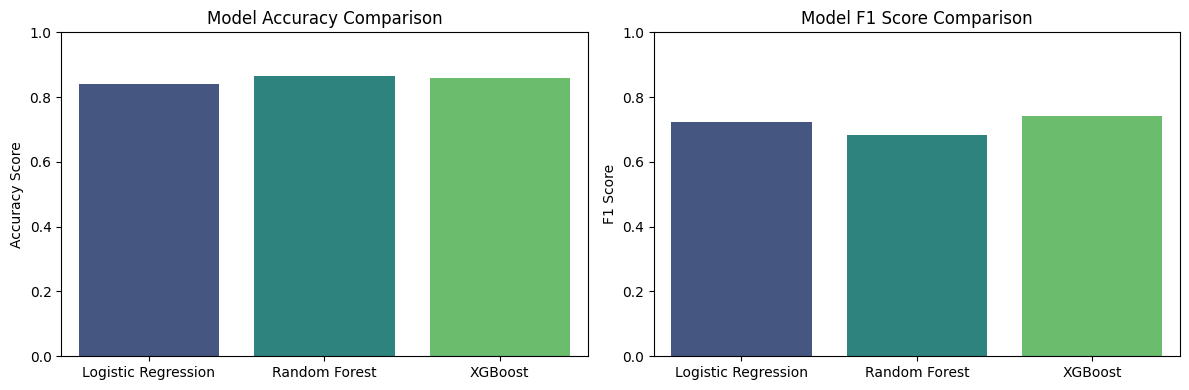

In [21]:
# Model names
models = ['Logistic Regression', 'Random Forest', 'XGBoost']

# Calculating metrics
accuracies = [
    accuracy_score(y_val, y_pred_log_reg),
    accuracy_score(y_val, y_pred_random_forest),
    accuracy_score(y_val, y_pred_xgboost)
]
f1_scores = [
    f1_score(y_val, y_pred_log_reg,average='macro'),
    f1_score(y_val, y_pred_random_forest,average='macro'),
    f1_score(y_val, y_pred_xgboost,average='macro')
]

# Plotting the comparison graph
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy Plot
sns.barplot(x=models, y=accuracies, palette="viridis", ax=axs[0])
axs[0].set_title('Model Accuracy Comparison')
axs[0].set_ylabel('Accuracy Score')
axs[0].set_ylim(0, 1)

# F1 Score Plot
sns.barplot(x=models, y=f1_scores, palette="viridis", ax=axs[1])
axs[1].set_title('Model F1 Score Comparison')
axs[1].set_ylabel('F1 Score')
axs[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()


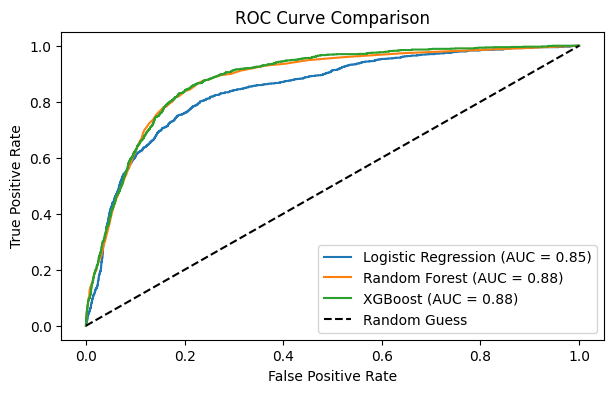

Logistic Regression AUC: 0.85
Random Forest AUC: 0.88
XGBoost AUC: 0.88


In [22]:
# Predicting probabilities for ROC curve calculation 
y_prob_log_reg = log_reg.predict_proba(X_val_rfe)[:, 1]  
y_prob_random_forest = random_forest.predict_proba(X_val_rfe)[:, 1]
y_prob_xgboost = xgboost.predict_proba(X_val_rfe)[:, 1]

# Computing ROC curves and AUC scores
log_reg_fpr, log_reg_tpr, log_reg_thresholds = roc_curve(y_val, y_prob_log_reg)
log_reg_auc = auc(log_reg_fpr, log_reg_tpr)

random_forest_fpr, random_forest_tpr, random_forest_thresholds = roc_curve(y_val, y_prob_random_forest)
random_forest_auc = auc(random_forest_fpr, random_forest_tpr)

xgboost_fpr, xgboost_tpr, xgboost_thresholds = roc_curve(y_val, y_prob_xgboost)
xgboost_auc = auc(xgboost_fpr, xgboost_tpr)

# Plotting the ROC curves
plt.figure(figsize=(7, 4))

plt.plot(log_reg_fpr, log_reg_tpr, label=f'Logistic Regression (AUC = {log_reg_auc:.2f})')

plt.plot(random_forest_fpr, random_forest_tpr, label=f'Random Forest (AUC = {random_forest_auc:.2f})')

plt.plot(xgboost_fpr, xgboost_tpr, label=f'XGBoost (AUC = {xgboost_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

print(f'Logistic Regression AUC: {log_reg_auc:.2f}')
print(f'Random Forest AUC: {random_forest_auc:.2f}')
print(f'XGBoost AUC: {xgboost_auc:.2f}')


**Model Accuracy Comparison:**
The Random Forest and XGBoost models have very similar accuracy scores, both higher than Logistic Regression.
Logistic Regression has slightly lower accuracy but is still close to the other models.

**Model F1 Score Comparison:**
XGBoost has the highest F1 score, indicating it balances precision and recall better than the other models.
Logistic Regression comes next with a slightly lower F1 score than XGBoost.
Random Forest has the lowest F1 score.

**AUC Score Comparison**
Logistic regression has the lowest AUC score among the three models.
Random Forest is showing improved performance over Logistic Regression and is same as XGBoost.

**Insights:**
XGBoost is the top-performing model.

# Hyperparameter Tuning for Final Model

In [23]:
# Hyperparameter Tuning for XGBoost Classifier
# Defining parameters grid
param_grid_xgboost = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0]
}

#GridSearchCV with XGBoostClassifer
grid_search_xgboost = GridSearchCV(estimator=xgboost, param_grid=param_grid_xgboost, cv=5, scoring='f1')
grid_search_xgboost.fit(X_train_rfe, y_train)
best_xgboost_model = grid_search_xgboost.best_estimator_
y_test_pred_encoded = best_xgboost_model.predict(X_test_rfe)
y_test_pred = ['yes' if pred == 1 else 'no' for pred in y_test_pred_encoded]

submission = pd.DataFrame({'id': test_df.index, 'target': y_test_pred})
submission.to_csv('submission.csv', index=False)

In [24]:
# optimal hyperparameters for the XGBoost model 
print("Best Parameters for XGBoost:", grid_search_xgboost.best_params_)

Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
